<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project_6/blob/main/ML_exposure_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series, DataFrame
from statsmodels.tsa.stattools import kpss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas import Series, DataFrame
from statsmodels.tsa.stattools import kpss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api
import datetime
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#EDA

In [222]:
df_25_pandas = pd.read_csv("https://raw.githubusercontent.com/LuisaPolicarpo/Project_6/main/Datasets/EXP_PM2_5_26012023152536994.csv")


In [283]:
df_25_pandas_final = pd.read_csv("https://raw.githubusercontent.com/LuisaPolicarpo/Project_6/main/Datasets/EXP_PM2_5_26012023152536994.csv")
df_25_pandas_final

,COU,Country,SMALL_SUBNATIONAL_REGION,Small subnational region,LARGE_SUBNATIONAL_REGION,Large subnational region,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1990,1990,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,7.76,E,Estimated value
1,AUS,Australia,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1995,1995,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,7.46,E,Estimated value
2,AUS,Australia,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2000,2000,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,7.45,E,Estimated value
3,AUS,Australia,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2001,2001,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,7.58,E,Estimated value
4,AUS,Australia,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2002,2002,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,7.60,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,MYT,Mayotte,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2016,2016,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.61,E,Estimated value
5493,MYT,Mayotte,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2017,2017,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.57,E,Estimated value
5494,MYT,Mayotte,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2018,2018,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.88,E,Estimated value
5495,MYT,Mayotte,NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2019,2019,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,8.04,E,Estimated value


In [223]:

df_population_europe = df_25_pandas.loc[df_25_pandas['Country'].isin(['European Union – 27 countries (from 01/02/2020)'])]

In [287]:
df_population_europe2 = df_25_pandas.loc[df_25_pandas['Country'].isin(['European Union – 27 countries (from 01/02/2020)'])]

In [302]:
df_population_europe2

,COU,Country,SMALL_SUBNATIONAL_REGION,Small subnational region,LARGE_SUBNATIONAL_REGION,Large subnational region,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5390,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1990,1990,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,21.445,E,Estimated value
5391,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1995,1995,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,20.165,E,Estimated value
5392,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2000,2000,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,18.683,E,Estimated value
5393,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2005,2005,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.294,E,Estimated value
5394,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2010,2010,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.097,E,Estimated value
5395,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2011,2011,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.370,E,Estimated value
5396,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2012,2012,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,15.574,E,Estimated value
5397,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2013,2013,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,15.025,E,Estimated value
5398,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2014,2014,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,14.211,E,Estimated value
5399,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2015,2015,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,14.438,E,Estimated value


In [224]:
df_population_europe

,COU,Country,SMALL_SUBNATIONAL_REGION,Small subnational region,LARGE_SUBNATIONAL_REGION,Large subnational region,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5390,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1990,1990,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,21.445,E,Estimated value
5391,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,1995,1995,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,20.165,E,Estimated value
5392,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2000,2000,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,18.683,E,Estimated value
5393,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2005,2005,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.294,E,Estimated value
5394,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2010,2010,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.097,E,Estimated value
5395,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2011,2011,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,17.370,E,Estimated value
5396,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2012,2012,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,15.574,E,Estimated value
5397,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2013,2013,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,15.025,E,Estimated value
5398,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2014,2014,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,14.211,E,Estimated value
5399,EU27_2020,European Union – 27 countries (from 01/02/2020),NaN,Not applicable,TOTAL,Total,PWM_EX,Mean population exposure to PM2.5,2015,2015,MICRO_M3,Micrograms per cubic metre,0,Units,NaN,NaN,14.438,E,Estimated value


In [225]:
df_population_europe.sort_values(by='Year', inplace = True)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [226]:
df_population_europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 5390 to 5403
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COU                       14 non-null     object 
 1   Country                   14 non-null     object 
 2   SMALL_SUBNATIONAL_REGION  0 non-null      float64
 3   Small subnational region  14 non-null     object 
 4   LARGE_SUBNATIONAL_REGION  14 non-null     object 
 5   Large subnational region  14 non-null     object 
 6   VAR                       14 non-null     object 
 7   Variable                  14 non-null     object 
 8   YEA                       14 non-null     int64  
 9   Year                      14 non-null     int64  
 10  Unit Code                 14 non-null     object 
 11  Unit                      14 non-null     object 
 12  PowerCode Code            14 non-null     int64  
 13  PowerCode                 14 non-null     object 
 14  Referen

In [227]:
df_population_europe.columns

Index(['COU', 'Country', 'SMALL_SUBNATIONAL_REGION',
       'Small subnational region', 'LARGE_SUBNATIONAL_REGION',
       'Large subnational region', 'VAR', 'Variable', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [228]:
df_population_europe.drop(['COU', 'Country'], axis = 1, inplace = True) 


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
df_population_europe.drop(['SMALL_SUBNATIONAL_REGION', 'LARGE_SUBNATIONAL_REGION', 'Small subnational region','Large subnational region','VAR','Variable','YEA','Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Flag Codes',
       'Flags'], axis = 1, inplace = True) 


In [303]:

df_population_europe2.drop(['SMALL_SUBNATIONAL_REGION', 'LARGE_SUBNATIONAL_REGION', 'Small subnational region','Large subnational region','VAR','Variable','YEA','Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Flag Codes',
       'Flags'], axis = 1, inplace = True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [305]:

df_population_europe2.drop(['COU', 'Country'], axis = 1, inplace = True) 


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [306]:
df_population_europe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 5390 to 5403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    14 non-null     int64  
 1   Value   14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 336.0 bytes


In [230]:
df_population_europe

,Year,Value
5390,1990,21.445
5391,1995,20.165
5392,2000,18.683
5393,2005,17.294
5394,2010,17.097
5395,2011,17.370
5396,2012,15.574
5397,2013,15.025
5398,2014,14.211
5399,2015,14.438


In [231]:
df_population_europe['Year'] = pd.to_datetime(df_population_europe["Year"], format='%Y')


<ipython-input-231-306e9257ba01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [232]:
df_population_europe

,Year,Value
5390,1990-01-01,21.445
5391,1995-01-01,20.165
5392,2000-01-01,18.683
5393,2005-01-01,17.294
5394,2010-01-01,17.097
5395,2011-01-01,17.370
5396,2012-01-01,15.574
5397,2013-01-01,15.025
5398,2014-01-01,14.211
5399,2015-01-01,14.438


In [234]:
# Set the date column as an index
df_population_europe.set_index('Year', inplace=True)

In [235]:
df_population_europe

,Value
Year,
1990-01-01,21.445
1995-01-01,20.165
2000-01-01,18.683
2005-01-01,17.294
2010-01-01,17.097
2011-01-01,17.370
2012-01-01,15.574
2013-01-01,15.025
2014-01-01,14.211


In [197]:
df_population_europe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 1970-01-01 00:00:00.000001990 to 1970-01-01 00:00:00.000002019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   14 non-null     float64
dtypes: float64(1)
memory usage: 224.0 bytes


# stationary?

In [200]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of the Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','Number of Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)
# The obtained p-value (0.07) is greater than 0.05 indicating that we cannot reject the null hyp. 
# So we failed to demonstrate the time series is non-stat


In [201]:
adf_test(df_population_europe['Value'])



Results of the Dickey-Fuller Test:
Test Statistic                 -2.721182
P-Value                         0.070444
Number of Lags Used             1.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [202]:
kpss(df_population_europe['Value'], regression='c', nlags = 'auto')
# The obtained p-value (0.01) is lower than 0.05 indicating that we can reject the null hyp. So the time series is non-stat.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(0.7420277318958365,
 0.01,
 1,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [203]:
df_population_europe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 1970-01-01 00:00:00.000001990 to 1970-01-01 00:00:00.000002019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   14 non-null     float64
dtypes: float64(1)
memory usage: 224.0 bytes


# Seasonal decomposition

In [239]:
df_population_europe.sort_index(inplace=True)

In [244]:
import statsmodels.api as sm


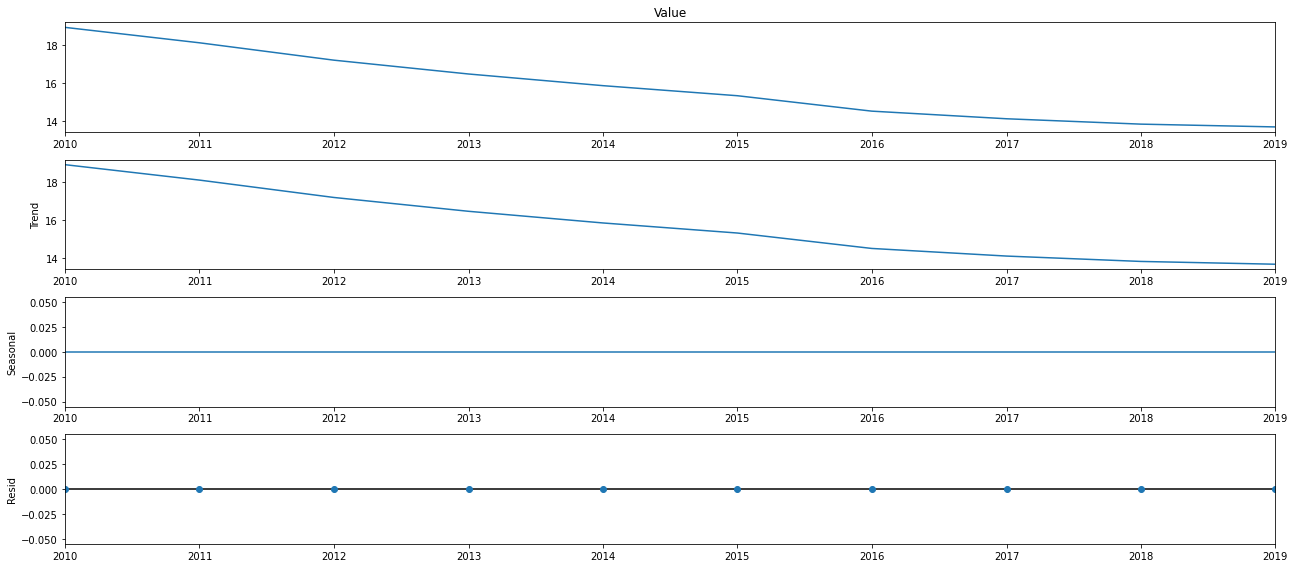

In [269]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition_pm = sm.tsa.seasonal_decompose(x = df_population_europe['Value'].rolling(5).mean().dropna(), model='additive')
fig = decomposition_pm.plot()
plt.show()

In [295]:
df_population_europe.reset_index(inplace=True)

In [296]:
df_population_europe

,Year,Value
0,1990-01-01,21.445
1,1995-01-01,20.165
2,2000-01-01,18.683
3,2005-01-01,17.294
4,2010-01-01,17.097
5,2011-01-01,17.370
6,2012-01-01,15.574
7,2013-01-01,15.025
8,2014-01-01,14.211
9,2015-01-01,14.438


In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
y_predict

array([13.74633171, 15.76850347, 15.47962179])

In [320]:
import numpy as np
import pandas as pd

df = pd.DataFrame(y_predict, columns = ['prediction'])
df

,prediction
0,15.565703
1,20.212962
2,14.984796


# Prediction

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

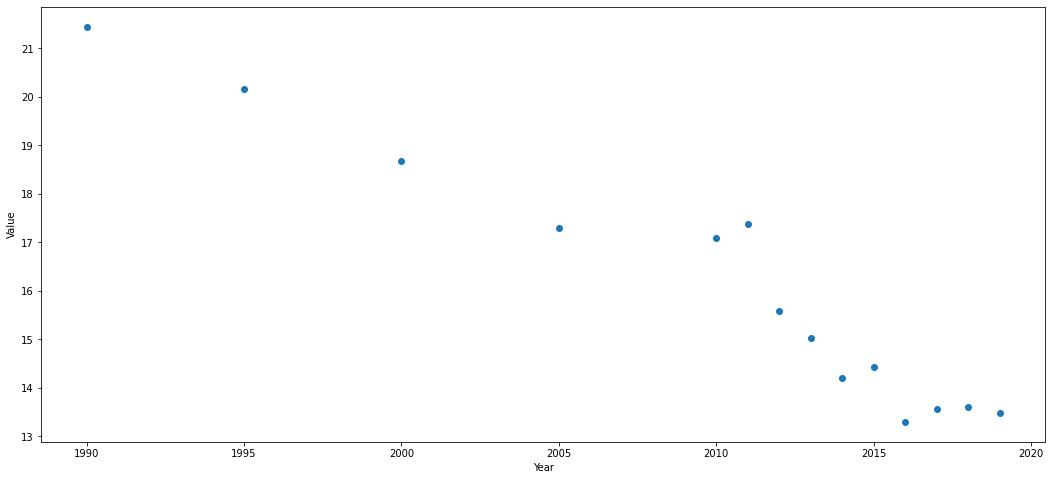

In [328]:
plt.xlabel('Year')
plt.ylabel('Value')
plt.scatter(df_population_europe2.Year, df_population_europe2.Value)



In [329]:
reg = linear_model.LinearRegression()
reg.fit(df_population_europe2[['Year']], df_population_europe2.Value)


LinearRegression()

In [346]:
#get the score
reg.score(df_population_europe2[['Year']], df_population_europe2.Value)

0.9369531276634345

In [342]:
reg.predict([[2040]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([7.36741618])

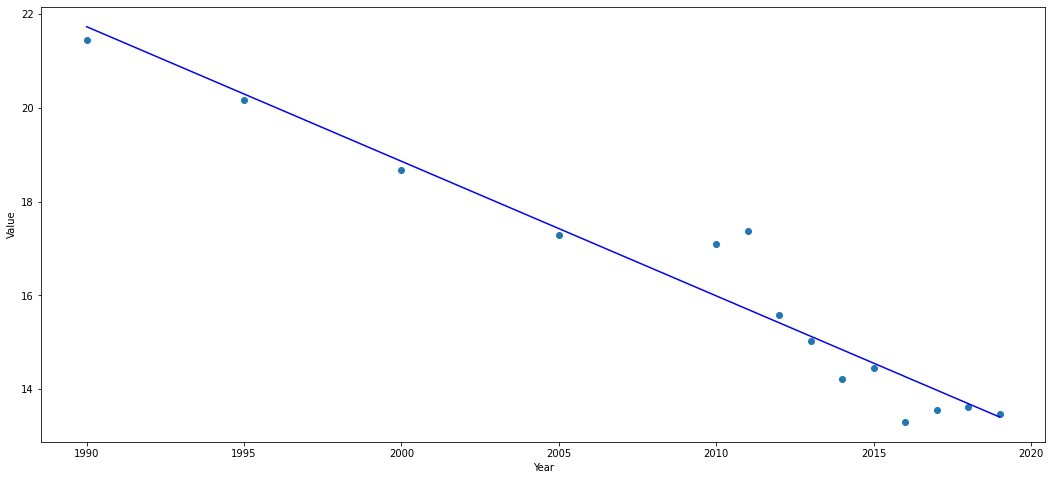

In [335]:
plt.xlabel('Year')
plt.ylabel('Value')
plt.scatter(df_population_europe2.Year, df_population_europe2.Value)
plt.plot(df_population_europe2.Year, reg.predict(df_population_europe2[['Year']]), color='blue')


# Forecasting with ARIMA

In [256]:
from sklearn.linear_model import LinearRegression
!pip install pmdarima
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [257]:

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

test_size_percentage = 0.75
test_size = int(test_size_percentage * df_population_europe.shape[0])
train_size_initial = df_population_europe.shape[0] - test_size

train_set = df_population_europe['Value'].iloc[:train_size_initial]
test_set = df_population_europe['Value'].iloc[train_size_initial:]


def expsm_forecast(tme_sries):
  es = ExponentialSmoothing(tme_sries).fit(smoothing_level=0.1)
  return es.forecast().iloc[0]
# arima_forecast(train_set)

print(train_set)
evaluation_df_es = pd.DataFrame(range(0, test_size), columns = ['forecast'])
evaluation_df_es['test'] = list(test_set)
evaluation_df_es['forecast'] = evaluation_df_es['forecast']\
  .apply(lambda n: expsm_forecast(df_population_europe['Value'].iloc[:train_size_initial + n]))

([<matplotlib.axis.YTick at 0x7f28f2d11ac0>,
 <a list of 5 Text major ticklabel objects>)

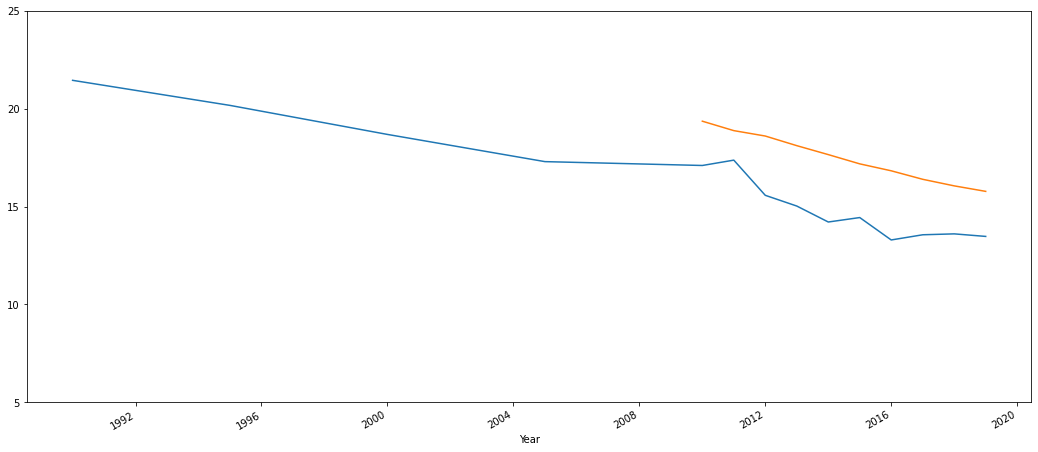

In [275]:
df_population_europe['Value'].plot()
evaluation_df_es.set_index(test_set.index)['forecast'].plot()

plt.yticks([5,10,15,20,25]) 
